In [34]:
#RFV not useful precipitation, use PRCP, RFV has all zero values
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates

#dhy = pd.read_csv('C:/Users/shahi/Downloads/TxtInOut_APEX1501_exdata/TxtInOut/SITE14.DHY', delimiter=r'\s+', skiprows=8)
sad = pd.read_csv('C:/Users/shahi/Downloads/TxtInOut_APEX1501_exdata/TxtInOut/SITE14.SAD', delimiter=r'\s+', skiprows=9)
#dhy.columns=dhy.columns.str.strip()
sad.columns=sad.columns.str.strip()
sad.columns

C:\Users\shahi\AppData\Local\Temp\ipykernel_11872\675421659.py:8: DtypeWarning: Columns (80) have mixed types. Specify dtype option on import or set low_memory=False.
  sad = pd.read_csv('C:/Users/shahi/Downloads/TxtInOut_APEX1501_exdata/TxtInOut/SITE14.SAD', delimiter=r'\s+', skiprows=9)


Index(['#', 'ID', 'Y', 'M', 'D', 'CPNM', 'HUI', 'LAI', 'RD', 'RW', 'BIOM',
       'STL', 'CPHT', 'STD', 'STDL', 'WS', 'NS', 'PS', 'KS', 'TS', 'AS',
       'SALT', 'REG', 'YN', 'QN', 'SSFN', 'PRKN', 'GMN', 'DN', 'NFIX', 'NMN',
       'NITR', 'AVOL', 'QDRN', 'FNO', 'FNMN', 'FNMA', 'RSFN', 'BUNL', 'QRFN',
       'SNOU', 'DNMO', 'DPKN', 'PSON', 'YNRP', 'QNRP', 'DN2', 'YNWN', 'PSO3',
       'YEFK', 'CPVH', 'CPVV', 'RFV', 'PSOQ', 'IRDL', 'WYLD', 'SW', 'RSYO',
       'RSYD', 'QRP', 'YRP', 'YNRP.1', 'YPRP', 'ZNH3', 'ZNO3', 'ZPML', 'ZSK',
       'UNM', 'UPM', 'UKM', 'RZSW', 'WTBL', 'GWST', 'STDO', 'RSD', 'RSVQ',
       'RSVY', 'RSSA', 'SWLT', 'SNO', 'RSDM', 'GWSN', 'ZSLT'],
      dtype='object')

In [35]:
# sub_dhy = dhy[dhy['ISA']==1]
# sub_dhy.rename(columns={'Y':'Year','M':'Month', 'D':'Day'},inplace=True)
# sub_dhy['DATE']=pd.to_datetime(sub_dhy[['Year','Month','Day']])
# sub_dhy['RFV_C']=sub_dhy['RFVmm'].cumsum()
# sub_dhy['Q_C']=sub_dhy['Qmm'].cumsum()*(-1)
# sub_dhy

sub_sad = sad[sad['#']==1]
sub_sad.rename(columns={'Y':'Year', 'M':'Month', 'D':'Day'}, inplace=True)
sub_sad['DATE'] = pd.to_datetime(sub_sad[['Year', 'Month', 'Day']])
# sub_sad['RFV_C']=sub_sad['RFV'].cumsum()
# sub_sad['PRCP_C']=sub_sad['PRCP'].cumsum()
# sub_sad['WYLD_C']=sub_sad['WYLD'].cumsum()
# sub_sad['INFLOW_C']=(sub_sad['IRGA']+sub_sad['DPRK']+sub_sad['RSSF']+sub_sad['PSOQ']+sub_sad['GWST']+sub_sad['SWLT']+sub_sad['SNO']).cumsum()
# sub_sad['OUTFLOW_C']=(sub_sad['ET']+sub_sad['SSF']+sub_sad['PRK']).cumsum()*(-1)


# inflow_param = {'YN','QN','SSFN','PRKN','GMN','DN','NFIX','NMN','NITR','AVOL','QDRN','RSFN','BUNL',
#                'QRFN','SNOU','DNMO','DPKN','YNRP','QNRP','DN2','YNWN'}
inflow_param = {'YN','QN','PRKN','GMN','DN','NMN','NITR','AVOL','RSFN','DPKN'}
outflow_param = {'FNO','FNMN','FNMA'}
#sub_sad['INFLOW_C']=sub_sad['PRCP']+sub_sad['SNOF']+sub_sad['SNOM']+sub_sad['PRK']
for var in inflow_param:
    sub_sad[f'{var}_C']=sub_sad[var].cumsum()
for var in outflow_param:
    sub_sad[f'{var}_C']=sub_sad[var].cumsum() * (-1)
# sub_sad['OUTFLOW_C']=sub_sad[]
#sub_sad['Q_C']=sub_sad['Q'].cumsum() * (-1)
pd.set_option('display.max_columns', None)
sub_sad.tail(1)

C:\Users\shahi\AppData\Local\Temp\ipykernel_11872\1773958942.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_sad.rename(columns={'Y':'Year', 'M':'Month', 'D':'Day'}, inplace=True)
C:\Users\shahi\AppData\Local\Temp\ipykernel_11872\1773958942.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_sad['DATE'] = pd.to_datetime(sub_sad[['Year', 'Month', 'Day']])
C:\Users\shahi\AppData\Local\Temp\ipykernel_11872\1773958942.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer]

,#,ID,Year,Month,Day,CPNM,HUI,LAI,RD,RW,BIOM,STL,CPHT,STD,STDL,WS,NS,PS,KS,TS,AS,SALT,REG,YN,QN,SSFN,PRKN,GMN,DN,NFIX,NMN,NITR,AVOL,QDRN,FNO,FNMN,FNMA,RSFN,BUNL,QRFN,SNOU,DNMO,DPKN,PSON,YNRP,QNRP,DN2,YNWN,PSO3,YEFK,CPVH,CPVV,RFV,PSOQ,IRDL,WYLD,SW,RSYO,RSYD,QRP,YRP,YNRP.1,YPRP,ZNH3,ZNO3,ZPML,ZSK,UNM,UPM,UKM,RZSW,WTBL,GWST,STDO,RSD,RSVQ,RSVY,RSSA,SWLT,SNO,RSDM,GWSN,ZSLT,DATE,DN_C,NITR_C,RSFN_C,NMN_C,GMN_C,PRKN_C,YN_C,DPKN_C,QN_C,AVOL_C,FNMA_C,FNMN_C,FNO_C
15316,1,13,1999,12,31,SPAS,0.4958,1.0095,1.8296,2.1387,6.4115,4.2728,0.2674,19.5808,1.1103,0.9976,0.0247,1.0,1.0,0.2839,1.0,1.0,0.0247,0.0,0.0,0.0,0.0,2.2867,0.0016,0.0,0.207,0.9529,0.1059,0.0,0.088,0.0002,0.0078,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,106.7754,0.0,0.0,0.0,0.0,0.0,0.0,3.3775,0.0,162.3752,0.0,15.2431,35.3257,91.642,106.7754,75.0,0.0018,0.01,5.5512,0.0,0.0,0.0,2.7239,0.0,2.5303,0.0000,0.0,1999-12-31,7.6653,1350.5673,1.9023,344.2203,2527.9038,2.8481,29.7741,0.9435,7.562,150.065,-6.5676,-0.1684,-74.096


In [36]:
#Storage changes
storage_param={'SW','GWST','RSVQ','SWLT','SNO'}
for var in storage_param:
     sub_sad[f'{var}_DIF']=sub_sad[var].diff().cumsum()
sub_sad.tail(1)

C:\Users\shahi\AppData\Local\Temp\ipykernel_11872\643763870.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_sad[f'{var}_DIF']=sub_sad[var].diff().cumsum()
C:\Users\shahi\AppData\Local\Temp\ipykernel_11872\643763870.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_sad[f'{var}_DIF']=sub_sad[var].diff().cumsum()
C:\Users\shahi\AppData\Local\Temp\ipykernel_11872\643763870.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

,#,ID,Year,Month,Day,CPNM,HUI,LAI,RD,RW,BIOM,STL,CPHT,STD,STDL,WS,NS,PS,KS,TS,AS,SALT,REG,YN,QN,SSFN,PRKN,GMN,DN,NFIX,NMN,NITR,AVOL,QDRN,FNO,FNMN,FNMA,RSFN,BUNL,QRFN,SNOU,DNMO,DPKN,PSON,YNRP,QNRP,DN2,YNWN,PSO3,YEFK,CPVH,CPVV,RFV,PSOQ,IRDL,WYLD,SW,RSYO,RSYD,QRP,YRP,YNRP.1,YPRP,ZNH3,ZNO3,ZPML,ZSK,UNM,UPM,UKM,RZSW,WTBL,GWST,STDO,RSD,RSVQ,RSVY,RSSA,SWLT,SNO,RSDM,GWSN,ZSLT,DATE,DN_C,NITR_C,RSFN_C,NMN_C,GMN_C,PRKN_C,YN_C,DPKN_C,QN_C,AVOL_C,FNMA_C,FNMN_C,FNO_C,SNO_DIF,SWLT_DIF,SW_DIF,RSVQ_DIF,GWST_DIF
15316,1,13,1999,12,31,SPAS,0.4958,1.0095,1.8296,2.1387,6.4115,4.2728,0.2674,19.5808,1.1103,0.9976,0.0247,1.0,1.0,0.2839,1.0,1.0,0.0247,0.0,0.0,0.0,0.0,2.2867,0.0016,0.0,0.207,0.9529,0.1059,0.0,0.088,0.0002,0.0078,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,106.7754,0.0,0.0,0.0,0.0,0.0,0.0,3.3775,0.0,162.3752,0.0,15.2431,35.3257,91.642,106.7754,75.0,0.0018,0.01,5.5512,0.0,0.0,0.0,2.7239,0.0,2.5303,0.0000,0.0,1999-12-31,7.6653,1350.5673,1.9023,344.2203,2527.9038,2.8481,29.7741,0.9435,7.562,150.065,-6.5676,-0.1684,-74.096,0.0,2.7239,-2.1712,0.0,-452.4169


C:\Users\shahi\AppData\Local\Temp\ipykernel_11872\3803493822.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap('tab20',n_lines)


<function matplotlib.pyplot.show(close=None, block=None)>

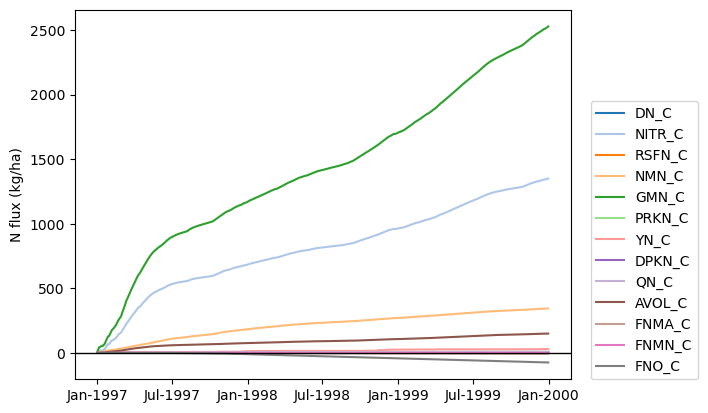

In [41]:
import matplotlib.cm as cm
fig,ax=plt.subplots()
n_lines = len(sub_sad.columns[84:])
colors = cm.get_cmap('tab20',n_lines)
for i, var in enumerate(sub_sad.columns[84:97]):
    plt.plot(sub_sad['DATE'], sub_sad[var], color=colors(i), label=var)
    ax.legend(sub_sad[var])
    #plt.errorbar(sub_sad['DATE'], sub_sad[var], ls="None")
#plt.plot(sub_sad['DATE'], sub_sad['PRCP_C'])
plt.xticks
plt.axhline(y=0, linewidth=1, color='k')
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=6))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))
plt.ylabel("N flux (kg/ha)")
#ax.legend(sub_sad.columns[84:])
plt.legend(loc=(1.04, 0))
plt.show

In [38]:
sub_sad['INFLOW']=sub_sad['PRCP']+sub_sad['SNOM']+sub_sad['PRK']+sub_sad['RSSF']
sub_sad['OUTFLOW']=sub_sad['ET']+sub_sad['EP']+sub_sad['Q']+sub_sad['DPRK']+sub_sad['QRF']
sub_sad['DIFF_STOR']= sub_sad['SW_DIF']+sub_sad['SWLT_DIF']+sub_sad['GWST_DIF']+sub_sad['RSVQ_DIF']+sub_sad['SNO_DIF']
sub_sad['RESIDUAL']=sub_sad['INFLOW']-sub_sad['OUTFLOW']-sub_sad['DIFF_STOR']
plt.plot(sub_sad['DATE'], sub_sad['RESIDUAL'], label="residual")
plt.plot(sub_sad['DATE'], sub_sad['INFLOW'])
plt.plot(sub_sad['DATE'], sub_sad['OUTFLOW'])
plt.plot(sub_sad['DATE'], sub_sad['DIFF_STOR'])
plt.show

KeyError: 'PRCP'

In [ ]:
inflow = {'PRCP','SNOF','SNOM','IRGA','QIN', 'RSQI', 'RSSF','RFV','PSOQ','RFIC'}
outflow = {'PET','ET','EP','Q','SSF','PRK','QDR','TLGE','TLGW', 'TLGQ','TLGF','EPP',
                 'RSQO','RSLK','DPRK','QFP','QRF','CPVH','CPVV','IRDL','WYLD'}
storage = {'RSEV','RSBK','SW','RZSW','GWST','RSVQ','SWLT','SNO'}

sub_sad = sad[sad['#']==1]
sub_sad.rename(columns={'Y':'Year', 'M':'Month', 'D':'Day'}, inplace=True)
sub_sad['DATE'] = pd.to_datetime(sub_sad[['Year', 'Month', 'Day']])

#sub_sad['INFLOW_C']=sub_sad['PRCP']+sub_sad['SNOF']+sub_sad['SNOM']+sub_sad['PRK']
for var in inflow:
    sub_sad[f'{var}_C']=sub_sad[var].cumsum()
for var in outflow:
    sub_sad[f'{var}_C']=sub_sad[var].cumsum() * (-1)
for var in storage:
     sub_sad[f'{var}_DIF']=sub_sad[var].diff().cumsum()
# sub_sad['OUTFLOW_C']=sub_sad[]
#sub_sad['Q_C']=sub_sad['Q'].cumsum() * (-1)
pd.set_option('display.max_columns', None)
sub_sad.tail(1)